[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/Ex05-NN-in-Keras.ipynb) 

# Exercise #5: Neural Networks using Keras 

We now know how the NN function, we will learn about the implementation of deep learning in Keras. [Keras](https://keras.io/) is one many programming frameworks for deep learning. As usual, different tools or frameworks have advantages and disadvantages. For Keras, the main advantage is simplicity. It is great for learning and will suffice for many applied deep learning research projects. You would probably not use Keras when writing code for production.

Keras is a high-level API, meaning that you need a partnering tool, a deep learning workhorse if you wish, that handles the actual computations. Keras supports multiple alternative but the most natural choice is probably Google's [Tensorflow](https://www.tensorflow.org/). Tensorflow is one of the most popular and powerful deep learning frameworks. When designing the course, we actually considered using Tensorflow for the tutorial but eventually decided against it because its use is more complicated when compared to Keras. For ADAMS, simplicity rules, and matters more than grater flexibility and the many other benefits Tensorflow other popular frameworks like [PyTorch](https://pytorch.org/), [MXNet](https://mxnet.apache.org/), to name just a few, have to offer. If you are interested in learning a little more about the different options, [this post](https://towardsdatascience.com/top-10-best-deep-learning-frameworks-in-2019-5ccb90ea6de) is a good starting point. And if you are interested, and since we are discussing about options, you might want to learn a bit about [Gluon](https://aws.amazon.com/de/blogs/aws/introducing-gluon-a-new-library-for-machine-learning-from-aws-and-microsoft/), a joint venture of Amazon AWS and Microsoft, which is another high-level deep learning interface to MXNet, among others. Gluon is also the framework used in our main text book [Dive into Deep Learning](http://d2l.ai/). And here is just [another GREAT resource](https://gluon.mxnet.io/index.html) for learning about deep learning and Gluon.      

Enough talking about libraries, frameworks and the like. Let's start with Keras. To that end, we will continue with the app store data set from [tutorial #4](https://github.com/Humboldt-WI/adams/blob/master/exercises/Ex04_NN_primer/Ex04-NN-Primer-part1.ipynb) and revisit many of the steps we went through in that tutorial. More specifically, here is the agenda for today. 

### Outline
Our goal is to build a NN for multi-class classification. We need to make several decisions when configuring our NN and focus on these when learning about Keras. 
 1. number of hidden layers
 2. number of neurons in hidden layers
 3. activation functions
 4. type of weight initialization
 5. loss function
 6. learning rate and momentum
 6. optimizer
 7. size of batch
 8. number of epochs
 9. regularization (dropout)

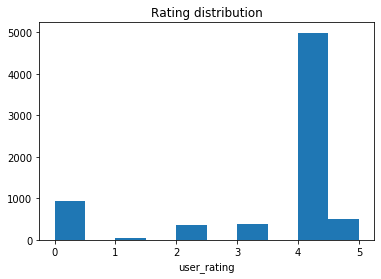

(5037, 35)
(5037, 6)


,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
track_name,,,,,,,,,,,,,,,,,,,,,
PAC-MAN Premium,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Evernote - stay organized,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,0
"WeatherBug - Local Weather, Radar, Maps, Alerts",-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"eBay: Best App to Buy, Sell, Save! Online Shopping",-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,0,1,0,0,0,0,0
Bible,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Setting up the environment: import standard libraries and load the data. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# Load dataset and set app name as index
data_file = '../../data/AppleStore_prep.csv' 
app = pd.read_csv(data_file, index_col=False, sep='\t', encoding='utf-8')
app = app.set_index('track_name')

# Prepare the target variable
# LabelEncoder() transforms a string vector to a num vector
encoder = LabelEncoder()
encoder.fit(app["user_rating"])
dummy_y = np_utils.to_categorical( encoder.transform(app["user_rating"]))
dummy_y

plt.hist(dummy_y.argmax(axis=1))
plt.xlabel('user_rating')
plt.title('Rating distribution')
plt.show();

# Let's split our data set
seed=42

X = app.iloc[:,:-1]
y = dummy_y.astype(int)

# Keep in mind that this data set is already normalized, which leads to a leakage of information from train set to test set
# When you are working with a dataset, make sure you normalize the variables in test set according to the parameters of the train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
print (X_train.shape)
print(y_train.shape) 
X.head(5)

### Preparing the Keras framework ###

Today we will revise the architecture of our basic neural network and look more into the tuning of hyperparameters.



### 1+2: Number of hidden layers and number of neurons
The number of layers and the number of neurons is a parameter that you would have to decide on. 

*Deep* neural network is the one with more than one layer, so we will use **2 hidden layers** this time.

As for neurons, look up for the industry practice, we went for **n=128**.

In [17]:
nb_units = 128

### 3: activation function ###
We will go for industry standard which is **relu** and keep a **softmax** at the end, given our multiclass task. We do not need to define those functions manually this time, Keras got our back.

IMPORTANT NOTE on output function for binary classification.
You could have two output neurons for every class and then run it through the softmax to aqcuire probabilities. However, the more efficient way (faster updating) would be to replace it with 1 neuron and a sigmoid function, which is basically a softmax for 2 classes:

$$y = \frac{1}{1 + e ^ {-x}} = \frac{1}{1 + \frac{1}{e ^ x}} = \frac{1}{\frac{e ^ x + 1}{e ^ x}} <= >\frac{e ^ x}{1 + e ^ x}  $$


### 4: weight initialisation
Weight initialization might seem minor but it can have a major impact on the convergence of the network.

At the picture: all weights are set to 0, second is the normally distributed weights with std=0.4. 
In the rightmost plot, the weights are drawn from normal distributions with variances which are inversely proportional to the number of inputs into each neuron (he normal).

<img src="https://intoli.com/blog/neural-network-initialization/img/training-losses.png"  alt="fwe" style="width: 1000px;"/> 

https://intoli.com/blog/neural-network-initialization/

We will be using the **He Normal initialization**, which is one of the industry standards and recommended for ReLu. It draws samples from a truncated normal distribution with $\mu=0$ and $ \sigma = \sqrt{2 / (i)}$, where $i$ is the number of input units in the weight tensor.

So in our case the standard deviation for our first weight matrix would be:

In [8]:
# If you remember we previously used the (6/(35)) - we used the Glorot uniform (also called Xavier initialization)
std = np.sqrt(2/(X.shape[1])) 
std

0.23904572186687872

## Let's put down what we have decided on already: ##
Keras offer you two "styles" of setting up the structure of your network (they call it two types of model): sequential and functional API (https://keras.io/models/about-keras-mod). It's a matter of preference in most cases, we will stick to **sequential** when the layers follow sequentially one after the other as it is slightly leaner in notation.

In [16]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

#set up the name of the model and its type
model = Sequential()

# Start adding layers one by one: 
model.add(Dense(nb_units,  #number of neurons
                activation='relu',  #activation function
                kernel_initializer=keras.initializers.he_normal(seed=seed),  #initialisation of weights; check doc for more options
                bias_initializer='zeros', #initialization of biases, will also be done by default
                input_shape=(X.shape[1],))) #first hidden layer size, i.e. number of features
# One more layer with the same configuration
model.add(Dense(nb_units, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros')) 

# And finally the outout layer
nb_classes = y.shape[1]
model.add(Dense(nb_classes, activation='softmax', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros')) 

######################let's see how our architecture looks like (also very helpful to learn how many parameters will be trained and compare to
#the size of your training set)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4608      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


Let's try to confirm these parameters manually.

In [18]:
# input to hidden layer:

print(X.shape[1] * nb_units + nb_units)

# first hidden to second hidden layer
print(nb_units * nb_units + nb_units)

# second hidden to output layer
print(nb_units * nb_classes)

4608
16512
768


In [20]:
# Functional API analogue
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(X.shape[1],))
layer1 = Dense(nb_units,  activation='relu', #activation function
                kernel_initializer=keras.initializers.he_normal(seed=seed), #initialisation of weights, 
                bias_initializer='zeros')(inputs)
layer2 = Dense(nb_units,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')(layer1)
predictions = Dense(nb_classes, activation='softmax')(layer2)

model = Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 35)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4608      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


### Wonderful, we have set up the infrastructure and can proceed with training
Most of the parameters that define the training process are set within the **compile** and **fit** methods.

The parameter optimization strategy is one of the most important choices for the training of the neural network.

We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like **Rmsprop, Adagrad,  Adam**, etc.

### 5+6: loss function, learning rate and optimizer
As discussed before, the loss function is defined by the task (mse, binary crossentropy, etc.), in our case it is crossentropy.
Learning rate is set in the optimizer but does not have to remain the same throughout the training (i.e. AdaGrad).

In [21]:
from keras import optimizers

# We use SGD as optimizer and cover more options later on
opt = optimizers.SGD(lr=0.01) # there are many more parameters that we could be adding here

# Calling compile and specifying some mandatory arguments completes setting up the NN
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 7+8: batch size and epochs ###
Batch size is a chunk of data that would be fed into the optimizer. Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes update the weights more slowly, but lead to more stable convergence. Batch Gradient Descent (all samples used for one update), Online Stochastic Gradient Descent (one sample used for one update), Mini-batch Stochastic Gradient Descent (More than one but less than all samples used for one update).
Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.

Epochs is the number of rounds the algorithm will go through the entire dataset. Usually the more epochs of training, the better are the results, until the network starts to overfit. When you see the results flattening out, it's the time to stop.

In [31]:
batch_size = 56 #1 for online SGD
epochs = 30

#And now we fit the model (that is the training part), mind that saving it to the 
# variable will help you retrieve and analyse the training history
story = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test) #OR validation_split=0.3
                 ) 

Train on 5037 samples, validate on 2160 samples
Epoch 1/30
5037/5037 [==============================] - 0s 28us/step - loss: 0.8272 - accuracy: 0.7238 - val_loss: 0.9247 - val_accuracy: 0.7106
Epoch 2/30
5037/5037 [==============================] - 0s 23us/step - loss: 0.8263 - accuracy: 0.7232 - val_loss: 0.9241 - val_accuracy: 0.7139
Epoch 3/30
5037/5037 [==============================] - 0s 22us/step - loss: 0.8256 - accuracy: 0.7230 - val_loss: 0.9235 - val_accuracy: 0.7116
Epoch 4/30
5037/5037 [==============================] - 0s 23us/step - loss: 0.8250 - accuracy: 0.7225 - val_loss: 0.9231 - val_accuracy: 0.7093
Epoch 5/30
5037/5037 [==============================] - 0s 23us/step - loss: 0.8246 - accuracy: 0.7238 - val_loss: 0.9252 - val_accuracy: 0.7079
Epoch 6/30
5037/5037 [==============================] - 0s 23us/step - loss: 0.8241 - accuracy: 0.7246 - val_loss: 0.9235 - val_accuracy: 0.7088
Epoch 7/30
5037/5037 [==============================] - 0s 23us/step - loss: 0.823

The output already provides a lot of information how well your model performance and whether is shows tendencies of overfitting. You can also obtain such insight explicitly after the model has trained. For example, you can use *evaluate()* to compute model performance. 

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9274489950250696
Test accuracy: 0.7087963223457336


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [30]:
story.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

It is good practice to define custom functions to diagnose model performance and display results as needed. Here are some examples.

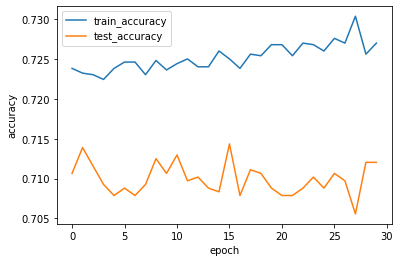

In [32]:
def show_history(story):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(story)

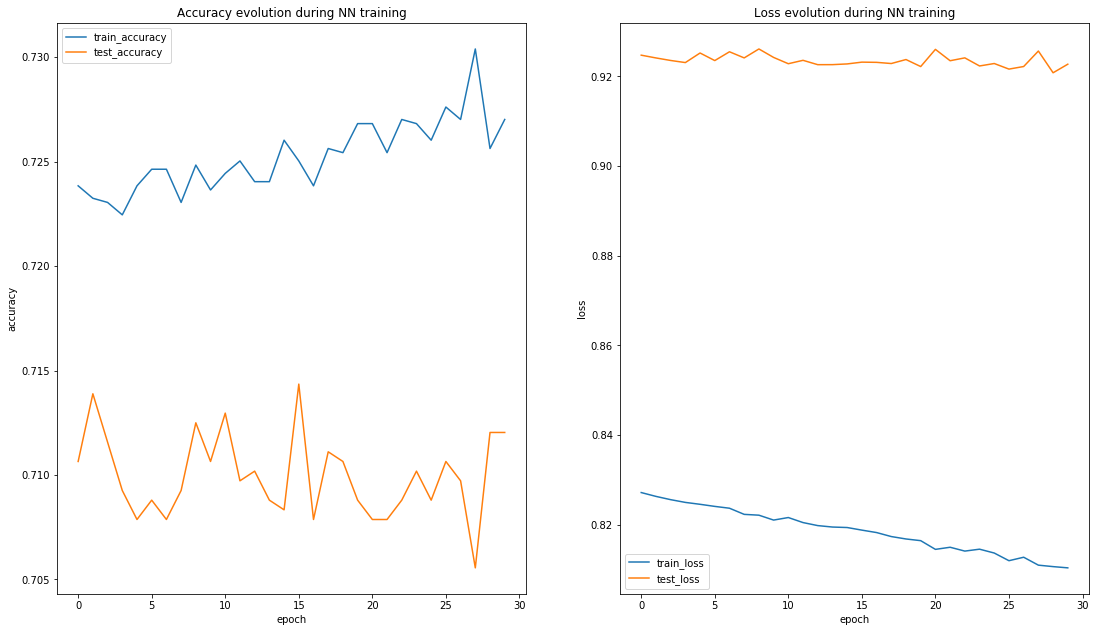

In [33]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)


To get more insight and benefit from the full stack of performance measures that you know, we can simply calculate test set predictions explicitly and then proceed with these in the usual way, producing ROC curves, confusion tables, and the like.

In [41]:
# Compute predictions
yhat = model.predict(X_test)
yhat.shape

(2160, 6)

In [42]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[4 4 4 ... 4 4 4]


In [ ]:
pd.crosstab(index=app["user_rating"],columns="count") 

In [48]:
from sklearn.metrics import classification_report
target_names = ["Grade 0","Grade 1","Grade 2","Grade 3","Grade 4","Grade 5"]
true_label = np.argmax(y_test,axis = 1)
print ('\nClasification report:\n', classification_report(true_label, yhat_c, target_names=target_names))


Clasification report:
               precision    recall  f1-score   support

     Grade 0       0.56      0.32      0.41       282
     Grade 1       0.00      0.00      0.00        20
     Grade 2       0.20      0.01      0.02       110
     Grade 3       0.21      0.03      0.05       117
     Grade 4       0.73      0.97      0.83      1489
     Grade 5       0.00      0.00      0.00       142

    accuracy                           0.71      2160
   macro avg       0.28      0.22      0.22      2160
weighted avg       0.60      0.71      0.63      2160



In [49]:
from sklearn.metrics import confusion_matrix
print ('\nConfusion matrix:\n', confusion_matrix(true_label, yhat_c))


Confusion matrix:
 [[  90    0    1    3  188    0]
 [   4    0    0    0   16    0]
 [  12    0    1    2   95    0]
 [   9    0    1    3  104    0]
 [  37    0    2    5 1444    1]
 [  10    0    0    1  131    0]]


### 9: dropout
Dropout 'impedes' the model and can be used against overfitting. It randomly sets a fraction rate of input units to 0 at each update during training time, which is a manner of regularization. Let's add up the Dropout rates after the hidden layers.



In [ ]:
#Let's add dropout layers to our model (we can leave the bias setting to default this time)
model = Sequential()
model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed),  input_shape=(35,)))
model.add(Dropout(0.1))

model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(Dropout(0.1))
model.add(Dense(nb_classes, activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=seed)))

model.summary()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #nothing changes here

In [ ]:
story = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))#there is a better solution to it
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
show_history(story)

### more on optimizers

So far we have mainly been looking at the SGD as our optimization algorithm, but there are many more: Adam, RMSprop, Adagrad, etc. (some more info here http://ruder.io/optimizing-gradient-descent/). Like other tools they all have their strengths and weaknesses. We will look more into Adam:

In [54]:
from keras import optimizers

model = Sequential()
model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(35,)))
model.add(Dropout(0.1))
model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(Dropout(0.1))
model.add(Dense(nb_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

story = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               4608      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


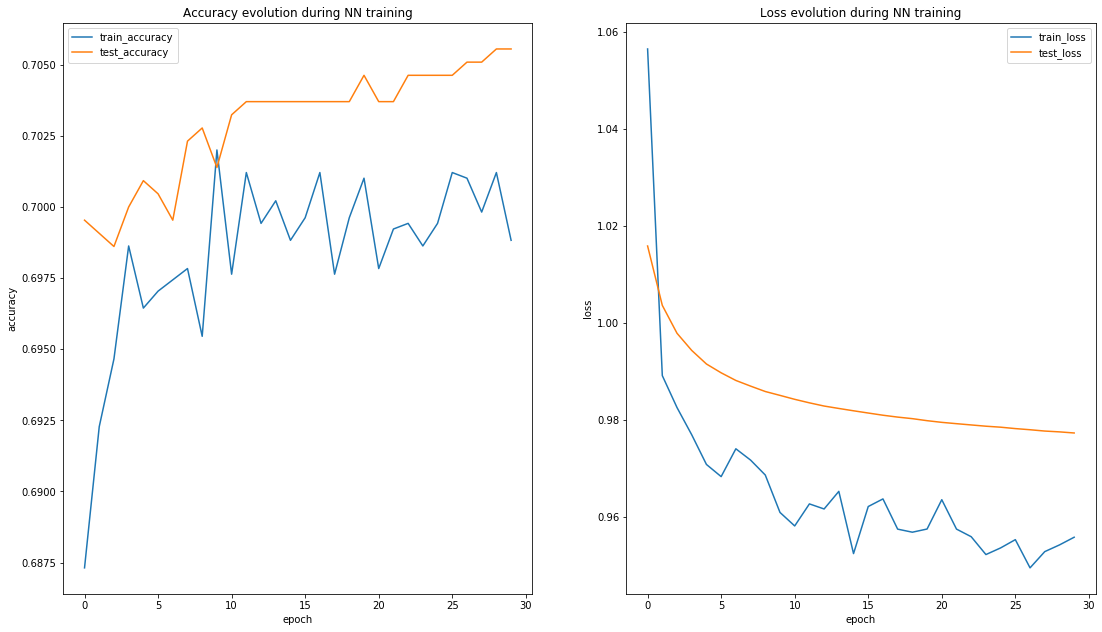

Test loss: 0.9773684545799538
Test accuracy: 0.7055555582046509


In [53]:
show_history(story)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### 10: momentum and learning rate


Learning rate has been overlooked for a while but currently a lot of research is looking into it.
Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results. However, learning rate doesn't have to be remained constant. We will try different learning rate schedules for our NN.

The SGD optimization algorithm in Keras has an argument called **decay**. This argument is used in the time-based learning rate decay schedule equation as follows:
LearningRate = LearningRate * 1/(1 + decay * epoch) (if decay=0 then there is no change)

Another term to know is **momentum**. Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.

$$\Delta  W_k(i) = -\eta  \frac{\partial E}{\partial W_k} + \mu  \Delta W_k(i-1)$$


$\mu$ is a momentum term here. Imagine if at some point gradient is zero, it would put the backpropagation to stall. Here momentum comes to the rescue - the algorithm remembers its last step, and adds some proportion of it to the current step. This way, even if the algorithm is stuck in a flat region, or a small local minimum, it can get out and continue towards the global minimum. So learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step. 



In [55]:
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(35,)))
model.add(Dropout(0.1))
model.add(Dense(nb_units, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
model.add(Dropout(0.1))
model.add(Dense(nb_classes, activation='softmax'))
# Compile model
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, decay=decay_rate, nesterov=False, momentum=momentum)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
story = model.fit(X_train, y_train, #name model differently
                    batch_size=56,
                    epochs=epochs*2,
                    verbose=0,
                 validation_data=(X_test, y_test))
                    #validation_split=0.33)#validation_data=(X_test, y_test)
score = model.evaluate(X_test, y_test, verbose=0)

Test loss: 0.9270786824049773
Test accuracy: 0.7074074149131775


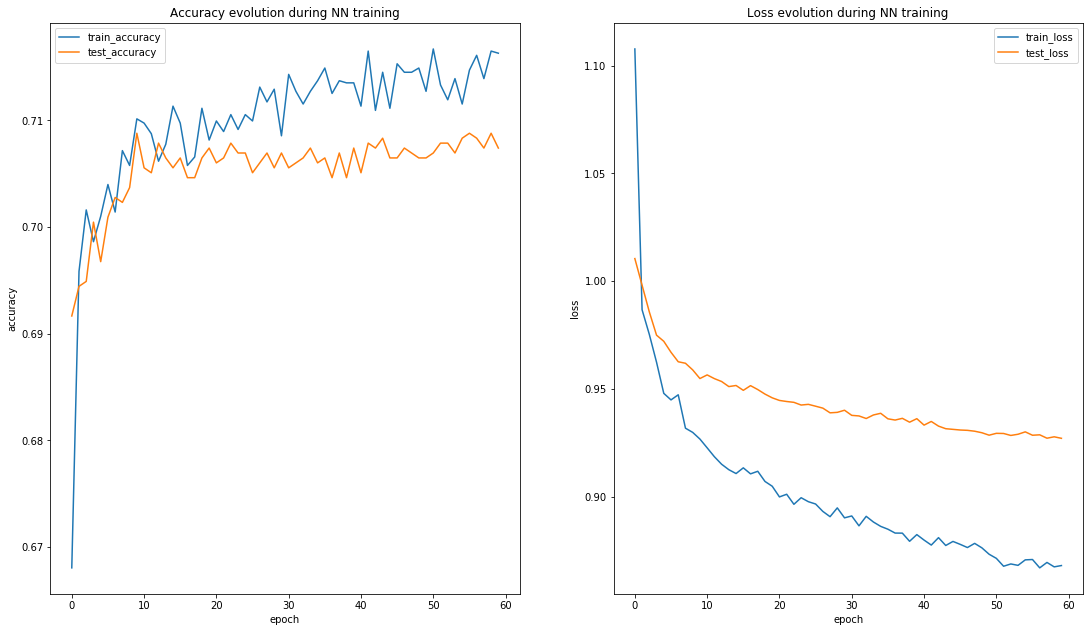

In [56]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
show_history(story)

## Early stopping

In [59]:
from keras.callbacks import EarlyStopping
cb=EarlyStopping(monitor='val_loss', min_delta=0.1, verbose=0, patience=10, restore_best_weights=True) #difference of loss is below min_delta, it is quantified as no improvement
story = model.fit(X_train, y_train, #name model differently
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[cb])
score = model.evaluate(X_test, y_test, verbose=0)

Train on 5037 samples, validate on 2160 samples
Epoch 1/30
5037/5037 [==============================] - 0s 40us/step - loss: 0.8542 - accuracy: 0.7161 - val_loss: 0.9215 - val_accuracy: 0.7097
Epoch 2/30
5037/5037 [==============================] - 0s 37us/step - loss: 0.8539 - accuracy: 0.7167 - val_loss: 0.9225 - val_accuracy: 0.7079
Epoch 3/30
5037/5037 [==============================] - 0s 37us/step - loss: 0.8523 - accuracy: 0.7183 - val_loss: 0.9208 - val_accuracy: 0.7093
Epoch 4/30
5037/5037 [==============================] - 0s 37us/step - loss: 0.8518 - accuracy: 0.7195 - val_loss: 0.9209 - val_accuracy: 0.7097
Epoch 5/30
5037/5037 [==============================] - 0s 37us/step - loss: 0.8503 - accuracy: 0.7157 - val_loss: 0.9203 - val_accuracy: 0.7097
Epoch 6/30
5037/5037 [==============================] - 0s 40us/step - loss: 0.8525 - accuracy: 0.7181 - val_loss: 0.9201 - val_accuracy: 0.7083
Epoch 7/30
5037/5037 [==============================] - 0s 35us/step - loss: 0.851

Test loss: 0.9214704500304328
Test accuracy: 0.7097222208976746


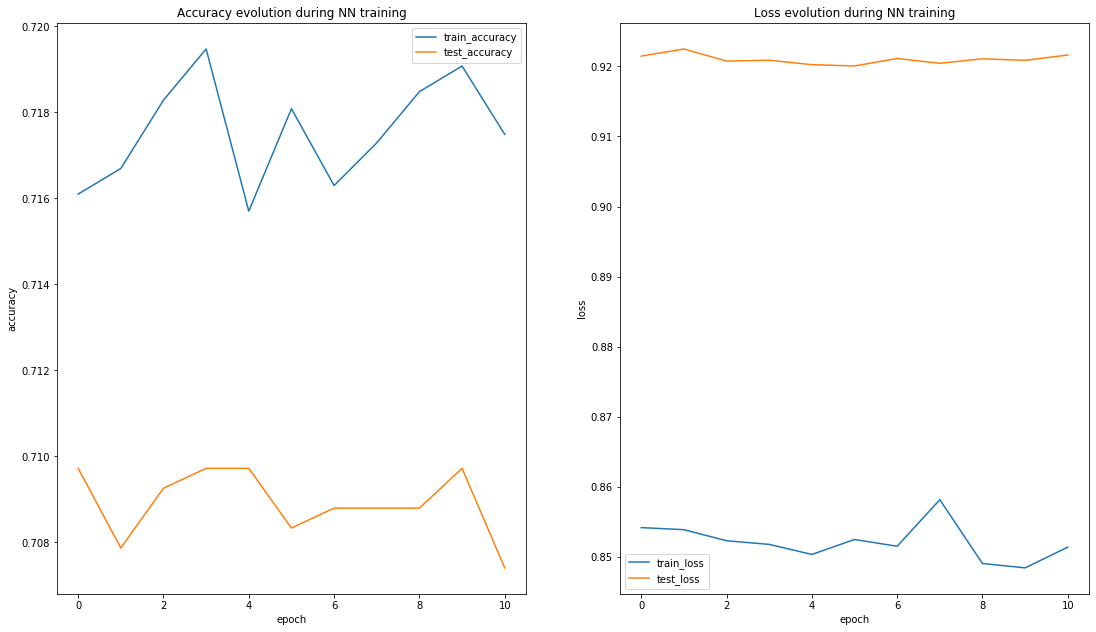

In [60]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
show_history(story)